# Module 1: Data Science Fundamentals

## Sprint 3: Intro to Modeling

## Spotify Challenge

<div><img style="width: 100%; " src="https://upload.wikimedia.org/wikipedia/commons/1/14/Iyyaka_Nastain_QR-Code_Spotify_Black.png" /></div>

## Background

For our sprint's project, we'll analyze some popular songs from Spotify. The dataset contains a number of variables that describe the songs, which we'll use to predict which genre it belongs to. 

---------

## How to start?

Download the dataset [from Kaggle](https://www.kaggle.com/insiyeah/musicfeatures) (`data.csv`) and read it. You should start by performing basic EDA on it. Afterwards, follow the requirements.

## Concepts to explore

We will use dimensionality reduction, do some clustering with K-means and perform modeling using logistic regression.

Look into the follow concepts, which will help you when modelling:
- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- [LabelEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
- [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

## Requirements

* Perform basic EDA.
* Perform dimensionality reduction on song features, verify data separability by genre (PCA and/or t-SNE).
* Infer genre using song features with logistic regression.
* Cluster songs by features. Generate lists of 5 of similar songs. Verify their similarity by actually listening to some of cluster items on Youtube / Spotify / any other streaming platform.

# Data Preprocessing

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score,silhouette_score, calinski_harabasz_score, classification_report, precision_score, recall_score, f1_score

## Messy Data, missing data and Outliers

In [45]:
dataset = pd.read_csv("https://raw.githubusercontent.com/komus/Monetha-Task/master/data.csv")


In [46]:
dataset.isnull().values.any()

False

In [47]:
dataset.isnull().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

The dataset has no null values

### Tempo distribution
Tempo is the speed at which a passage of music is played. Typically, tempo is measured according to beats per minute (bpm).  
https://www.musical-u.com/learn/rhythm-tips-for-identifying-music-genres-by-ear/

The Tempo distribution is a Gaussian distribution. Disco genre peaks around 125BPM

Text(0.5, 0, 'Tempo')

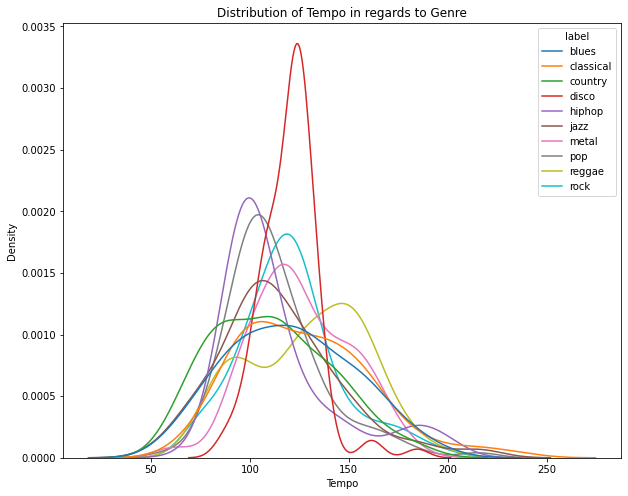

In [48]:
temp_genre = dataset[['label','tempo','filename']]

temp = temp_genre.pivot(index = 'filename', columns='label', values='tempo')
plt.figure(1, figsize=(10,8))
sns.kdeplot(data = temp)
plt.title("Distribution of Tempo in regards to Genre")
plt.xlabel("Tempo")


In [49]:
temp_genre['tempo'].mean()

119.60170189683195

### Beats
The unit division of musical time is called a beat. Just as one is aware of the body’s steady pulse, or heartbeat, so in composing, performing, or listening to music one is aware of a periodic succession of beats.

Text(0.5, 0, 'Beats')

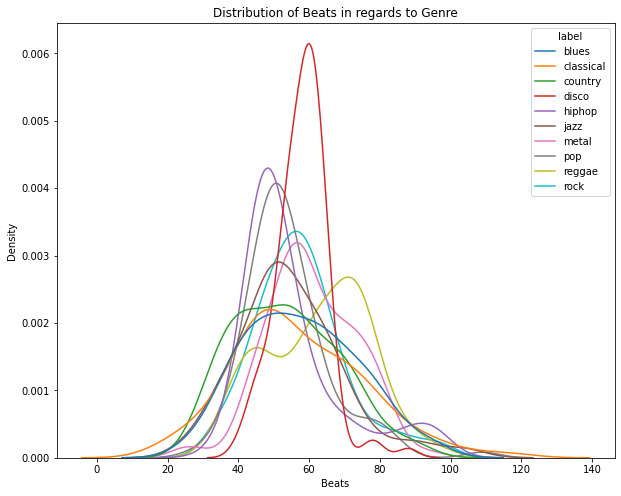

In [50]:
beats_genre = dataset[['label','tempo','filename', 'beats']]

beats = beats_genre.pivot(index = 'filename', columns='label', values='beats')
plt.figure(1, figsize=(10,8))
sns.kdeplot(data = beats)
plt.title("Distribution of Beats in regards to Genre")
plt.xlabel("Beats")

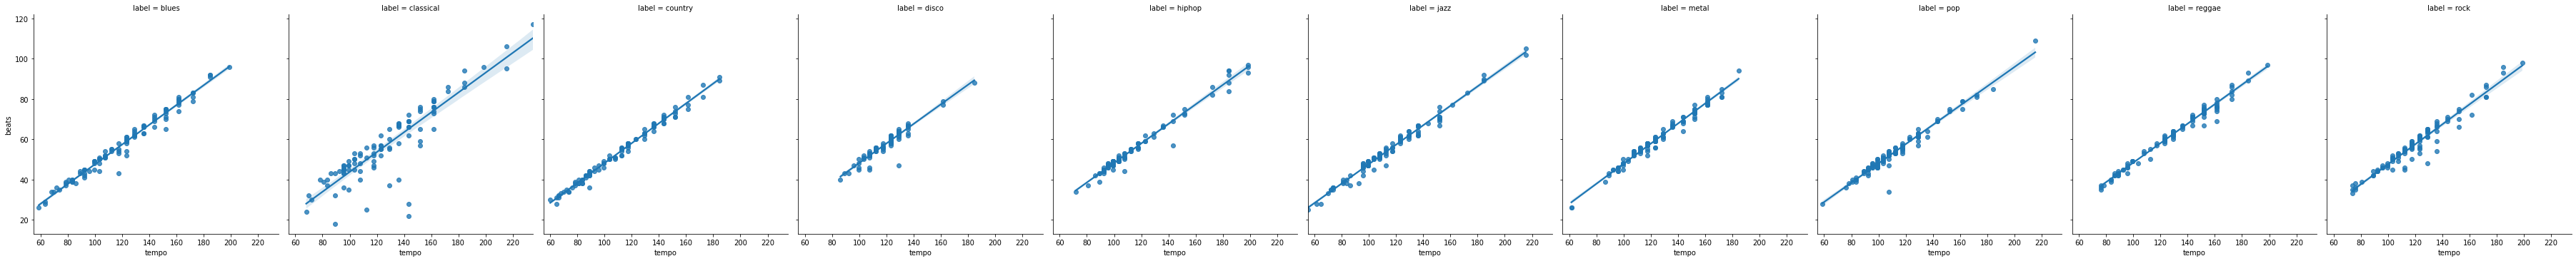

In [51]:
sns.lmplot(x="tempo", y="beats", col = "label", data=beats_genre)

The density distribution of tempo and beats looks similar. In simple terms, tempo is how fast or slow a piece of music is performed, while rhythm is the placement of sounds in time, in a regular and repeated pattern. Tempo is measured in beats per min

### Spectral centroid

The spectral centroid is a measure used in digital signal processing to characterise a spectrum. It indicates where the center of mass of the spectrum is located.Because the spectral centroid is a good predictor of the "brightness" of a sound, it is widely used in digital audio and music processing as an automatic measure of musical timbre

https://www.sciencedirect.com/topics/engineering/spectral-centroid

Text(0.5, 0, 'Spectral Centroid')

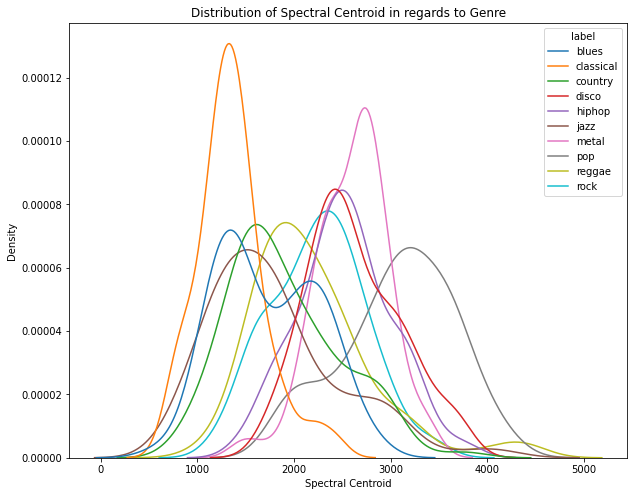

In [52]:
spectral_centroid_genre = dataset[['label','spectral_centroid','filename', 'tempo']]

spectral_centroid = spectral_centroid_genre.pivot(index = 'filename', columns='label', values='spectral_centroid')
plt.figure(1, figsize=(10,8))
sns.kdeplot(data = spectral_centroid)
plt.title("Distribution of Spectral Centroid in regards to Genre")
plt.xlabel("Spectral Centroid")

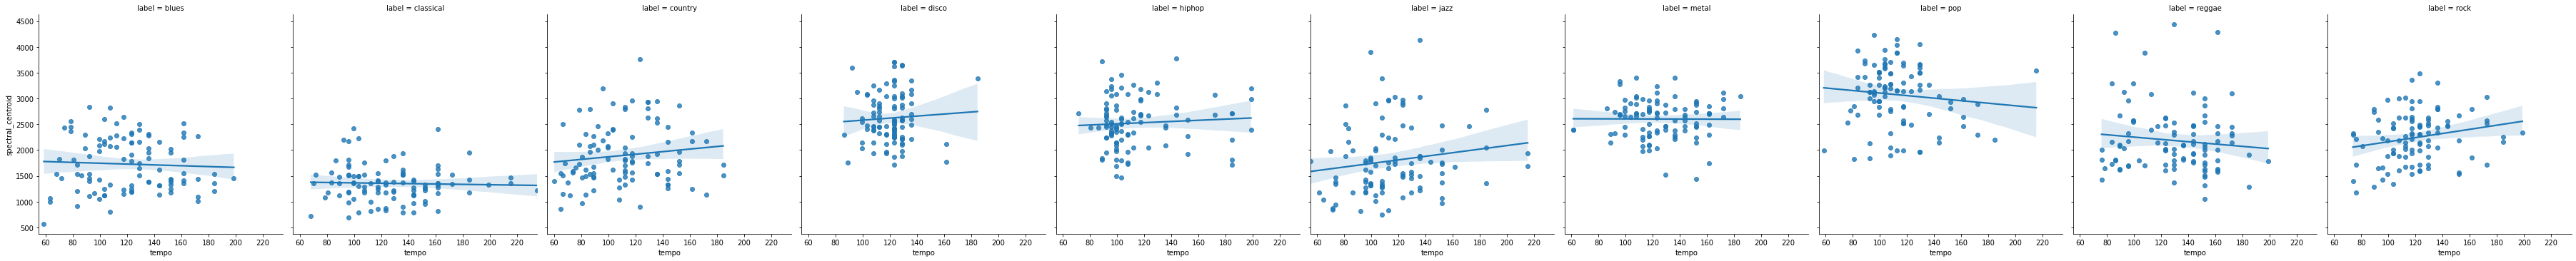

In [53]:
sns.lmplot(x="tempo", y="spectral_centroid", col = "label", data=spectral_centroid_genre)

## Feature Engineering - Label Encoder

Here, the categorical data "label" will be converted to numerical

In [54]:
target = dataset['label']
features = dataset.drop(['label','filename'], axis=1)
lb = LabelEncoder()
lb.fit(target.astype('str'))
enc_target = pd.Series(lb.transform(target.astype('str'))).to_frame()
enc_target.value_counts()

9    100
8    100
7    100
6    100
5    100
4    100
3    100
2    100
1    100
0    100
dtype: int64

## Feature Scaling - Rescaling Data

Standardization of features

In [55]:
scalar = StandardScaler()
scalar.fit(features)
scaled_features = scalar.transform(features)

# Dimension Reduction


## PCA

Reduce the dimension of the dataset using PCA

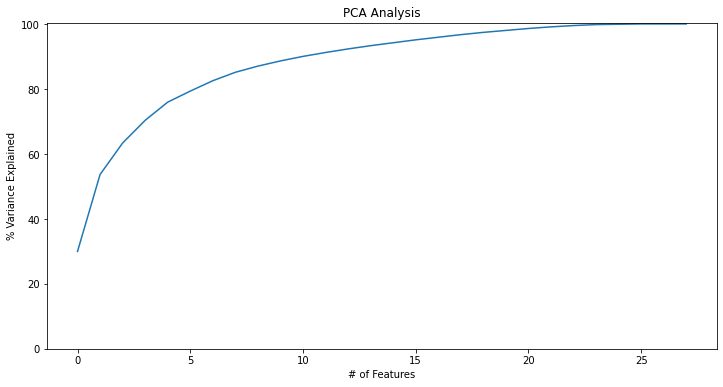

In [56]:
n_number = scaled_features.shape[1]
pca = PCA(n_components=n_number)
pca.fit(scaled_features)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

In [57]:
pca_s = PCA(n_components=5)
pca_scaled_feature = pca_s.fit_transform(scaled_features)
pca_s.explained_variance_ratio_

array([0.30015603, 0.23734956, 0.09719003, 0.0695376 , 0.05551449])

In [58]:
pca_scaled_feature_d = pd.DataFrame(pca_scaled_feature, columns=['pc1','pc2','pc3','pc4','pc5'])

## T-SNE

Reduce Domensionality by T-SNE

In [59]:
tsne = TSNE(n_components=3)
tsne_scaled_features = tsne.fit_transform(scaled_features)

In [60]:
tsne_scaled_features_d = pd.DataFrame(tsne_scaled_features, columns=['tsne1', 'tsne2', 'tsne3'])

# Modelling

In [61]:
def cluster_accuracy(data, pred_data, target):
  sil = silhouette_score(data, pred_data, metric='euclidean')
  cal = calinski_harabasz_score(data, pred_data)

  return sil, cal

In [62]:
def logistic_accuracy(y_true, y_pred):
  return accuracy_score(y_true, y_pred),precision_score(y_true, y_pred, average='weighted'), recall_score(y_true, y_pred, average='weighted'), f1_score(y_true,y_pred, average='weighted')

## Logistic Regression

### Logistic Regression without Scaling

In [63]:
x_train, x_test, y_train, y_test = train_test_split(features,enc_target,test_size = 0.1)

In [64]:
lg = LogisticRegression(max_iter=600)
lg.fit(x_train, y_train.values.ravel())
lg_pred = lg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [65]:
lg_score = logistic_accuracy(y_test, lg_pred)

In [66]:
print(classification_report(y_test, lg_pred))

              precision    recall  f1-score   support

           0       0.86      0.32      0.46        19
           1       0.75      0.92      0.83        13
           2       0.33      0.29      0.31         7
           3       0.50      0.20      0.29        10
           4       0.43      0.33      0.38         9
           5       0.50      0.40      0.44         5
           6       0.50      1.00      0.67         8
           7       0.64      0.78      0.70         9
           8       0.70      0.58      0.64        12
           9       0.21      0.50      0.30         8

    accuracy                           0.53       100
   macro avg       0.54      0.53      0.50       100
weighted avg       0.60      0.53      0.52       100



### Logistic Regression without dimension reduction but scaled

In [67]:
features_train, features_test, target_train, target_test = train_test_split(scaled_features,enc_target,test_size = 0.1)

In [68]:
logreg = LogisticRegression(max_iter=600)
logreg.fit(features_train, target_train.values.ravel())
logreg_pred = logreg.predict(features_test)
logreg_score = logistic_accuracy(target_test, logreg_pred)

In [69]:
print(classification_report(target_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.88      0.88      0.88         8
           2       0.75      0.43      0.55        14
           3       0.40      0.36      0.38        11
           4       0.57      0.67      0.62        12
           5       0.45      0.83      0.59         6
           6       0.75      0.82      0.78        11
           7       0.82      0.69      0.75        13
           8       0.60      0.60      0.60        10
           9       0.22      0.33      0.27         6

    accuracy                           0.61       100
   macro avg       0.62      0.62      0.60       100
weighted avg       0.64      0.61      0.61       100



### Logisic Regression with PCA

In [70]:
features_train_pca, features_test_pca, target_train_pca, target_test_pca = train_test_split(pca_scaled_feature_d,enc_target,test_size = 0.1)

In [71]:
logreg_pca = LogisticRegression()
logreg_pca.fit(features_train_pca, target_train_pca.values.ravel())
logreg_pred_pca = logreg_pca.predict(features_test_pca)
log_pca = logistic_accuracy(target_test_pca,logreg_pred_pca)

In [72]:
print(classification_report(target_test_pca, logreg_pred_pca))

              precision    recall  f1-score   support

           0       0.25      0.31      0.28        13
           1       0.86      0.86      0.86         7
           2       0.25      0.20      0.22        10
           3       0.36      0.50      0.42         8
           4       0.86      0.46      0.60        13
           5       0.33      0.22      0.27         9
           6       0.42      0.85      0.56        13
           7       0.62      0.56      0.59         9
           8       0.50      0.50      0.50         8
           9       0.33      0.10      0.15        10

    accuracy                           0.45       100
   macro avg       0.48      0.46      0.44       100
weighted avg       0.47      0.45      0.44       100



### Logistic Regression with T-SNE

In [73]:
features_train_tsne, features_test_tsne, target_train_tsne, target_test_tsne = train_test_split(tsne_scaled_features_d,enc_target,test_size = 0.1)

In [74]:
logreg_tsne = LogisticRegression(max_iter=600)
logreg_tsne.fit(features_train_tsne, target_train_tsne.values.ravel())
logreg_pred_tsne = logreg_tsne.predict(features_test_tsne)
log_tsne = logistic_accuracy(target_test_tsne, logreg_pred_tsne)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
print(classification_report(target_test_tsne, logreg_pred_tsne))

              precision    recall  f1-score   support

           0       0.29      0.36      0.32        11
           1       0.58      0.78      0.67         9
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         9
           5       0.27      0.23      0.25        13
           6       0.50      0.90      0.64        10
           7       0.36      0.71      0.48         7
           8       0.42      0.50      0.45        10
           9       0.20      0.22      0.21         9

    accuracy                           0.35       100
   macro avg       0.26      0.37      0.30       100
weighted avg       0.25      0.35      0.29       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## K - Means


### Kmeans without dimension reduction but scaled data

In [76]:
km_s = KMeans(n_clusters=10,init='k-means++', random_state=42)
km_s.fit(scaled_features)
labels_km_scale = km_s.labels_
y_km_s = km_s.predict(scaled_features)
kmeans_score_s  = cluster_accuracy(scaled_features,y_km_s, enc_target)
kmeans_score_s

(0.12298876911272688, 142.48997421422877)

### K means with PCA

In [77]:
km_cluster = KMeans(n_clusters=10,init='k-means++', random_state=42)
km_cluster.fit(pca_scaled_feature_d)
labels_pca_scale = km_cluster.labels_
y_km = km_cluster.predict(pca_scaled_feature_d)
clusters_pca_scale = pd.concat([pca_scaled_feature_d, pd.DataFrame({'pca_clusters':y_km})], axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


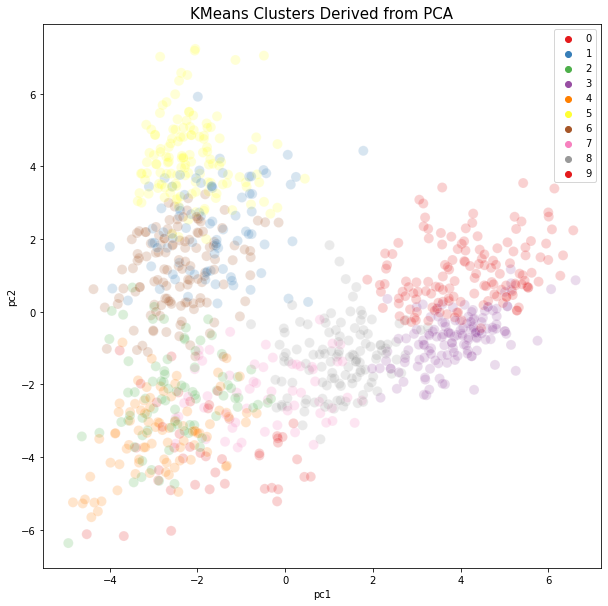

In [78]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_pca_scale.iloc[:,0],clusters_pca_scale.iloc[:,1], hue=labels_pca_scale, palette='Set1', s=100, alpha=0.2).set_title('KMeans Clusters Derived from PCA', fontsize=15)
plt.legend()
plt.show()

In [79]:
kmeans_score_pca = cluster_accuracy(pca_scaled_feature_d, y_km, enc_target)
kmeans_score_pca

(0.20564328480669797, 302.9012906203145)

In [80]:
for i in range(2):
  print("Cluster " + str(i))
  print(dataset[y_km == i].sample(5))

Cluster 0
            filename       tempo  beats  ...    mfcc19    mfcc20   label
494  hiphop.00024.au  103.359375     49  ...  4.699639  4.411028  hiphop
611   metal.00075.au  112.347147     54  ... -3.965957  0.001036   metal
625   metal.00035.au  117.453835     55  ... -2.185812  1.389248   metal
480  hiphop.00016.au   99.384014     49  ...  7.630041  4.392494  hiphop
396   disco.00072.au  135.999178     67  ... -2.669735  6.573678   disco

[5 rows x 30 columns]
Cluster 1
            filename       tempo  beats  ...    mfcc19    mfcc20   label
826  reggae.00070.au  172.265625     87  ... -4.441484 -9.696086  reggae
828  reggae.00082.au   99.384014     49  ... -1.549520 -1.283727  reggae
857  reggae.00068.au  135.999178     66  ...  1.143304 -1.559973  reggae
478  hiphop.00036.au  117.453835     58  ...  4.928653  3.716646  hiphop
852  reggae.00080.au   99.384014     49  ... -0.940888 -1.087156  reggae

[5 rows x 30 columns]


### K means with T-SNE

In [81]:
km_cluster_tsne = KMeans(n_clusters=10,init='k-means++', random_state=42)
km_cluster_tsne.fit(tsne_scaled_features_d)
labels_tsne_scale = km_cluster_tsne.labels_
y_km_tsne = km_cluster_tsne.predict(tsne_scaled_features_d)
clusters_tsne_scale = pd.concat([tsne_scaled_features_d, pd.DataFrame({'pca_clusters_tsne':y_km_tsne})], axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


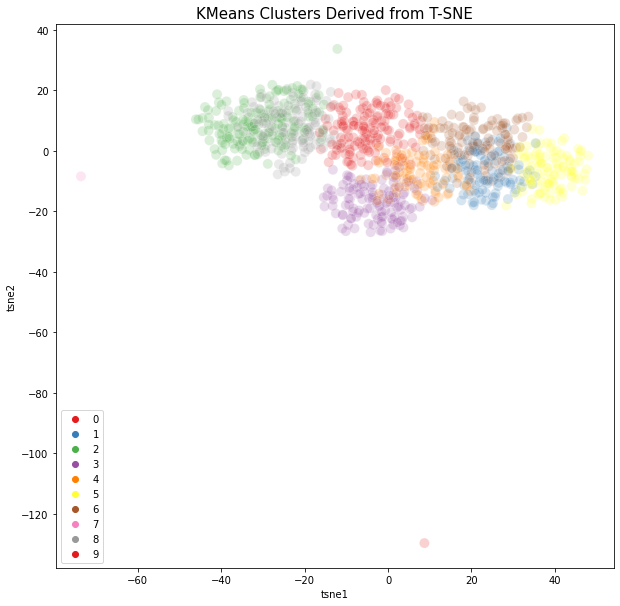

In [82]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1], hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.2).set_title('KMeans Clusters Derived from T-SNE', fontsize=15)
plt.legend()
plt.show()

In [83]:
kmeans_score_tsne=cluster_accuracy(tsne_scaled_features_d, y_km_tsne, enc_target)
kmeans_score_tsne

(0.29085287, 677.3669125090147)

In [84]:
for i in range(2):
  print("Cluster " + str(i))
  print(dataset[y_km_tsne == i].head(5))

Cluster 0
         filename       tempo  beats  ...    mfcc19    mfcc20  label
1  blues.00022.au   95.703125     44  ...  3.316913 -0.608485  blues
3  blues.00012.au  184.570312     91  ... -1.418707 -5.932607  blues
4  blues.00056.au  161.499023     74  ...  0.024832 -2.005315  blues
5  blues.00058.au  107.666016     51  ...  0.842872 -3.416576  blues
9  blues.00014.au  151.999081     70  ... -1.004448 -1.802434  blues

[5 rows x 30 columns]
Cluster 1
               filename       tempo  beats  ...    mfcc19    mfcc20      label
156  classical.00052.au  161.499023     74  ... -4.410137 -5.038042  classical
172  classical.00049.au  103.359375     53  ... -3.808980  0.233789  classical
200    country.00013.au  129.199219     63  ... -4.394539 -2.610648    country
203    country.00033.au   92.285156     44  ...  1.161944 -1.835098    country
213    country.00043.au  135.999178     68  ...  1.084320 -1.454359    country

[5 rows x 30 columns]


## Modelling Result Analysis

In [85]:
kmeansAnalysis={}
kmeansAnalysis['Category'] = ['Scaled K means without dimension reduction','K means with PCA', 'K means with TSNE']
kmeansAnalysis['silhouette_score'] = [kmeans_score_s[0],kmeans_score_pca[0], kmeans_score_tsne[0]]
kmeansAnalysis['calinski_harabasz_score'] = [kmeans_score_s[1],kmeans_score_pca[1], kmeans_score_tsne[1]]
pd.DataFrame(kmeansAnalysis)

,Category,silhouette_score,calinski_harabasz_score
0,Scaled K means without dimension reduction,0.122989,142.489974
1,K means with PCA,0.205643,302.901291
2,K means with TSNE,0.290853,677.366913


In [86]:
logistic_reg = {}
logistic_reg['category']=['LG without scaling', 'LG scaled data without dimension reduction', 'Scaled LG with PCA', 'Scaled LG with T-SNE']
logistic_reg['Accuracy'] = [lg_score[0], logreg_score[0], log_pca[0], log_tsne[0]]
logistic_reg['Precision'] = [lg_score[1], logreg_score[1], log_pca[1], log_tsne[1]]
logistic_reg['Recall'] = [lg_score[2], logreg_score[2], log_pca[2], log_tsne[2]]
logistic_reg['F1'] = [lg_score[3], logreg_score[3], log_pca[3], log_tsne[3]]
pd.DataFrame(logistic_reg)


,category,Accuracy,Precision,Recall,F1
0,LG without scaling,0.53,0.595377,0.53,0.517761
1,LG scaled data without dimension reduction,0.61,0.641327,0.61,0.613246
2,Scaled LG with PCA,0.45,0.472603,0.45,0.435428
3,Scaled LG with T-SNE,0.35,0.254050,0.35,0.289721


## Evaluation Criteria

- PCA/TSNE performed correctly and results analyzed
- Clustering done correctly and results analyzed
- Adherence to the requirements
- Model trained on given data and its performance evaluated
- Code quality


## Sample correction questions

During a correction, you may get asked questions that test your understanding of covered topics.

- What does a PCA do? How are principal components selected?
- Explain linear regression. What are the main assumptions of linear regression?
- What is K-means clustering? How does it work?
- When would you prefer T-SNE over. PCA?